<H1>Pandas Overview</H1>
<br/>
Dr. Chris Teplovs<br/>
University of Michigan<br/>
School of Information<br/>
<p>
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
</small>
</p>

This is a short introduction to pandas, geared mainly for new users.

This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) on the Pandas official website. It was ported to a Jupyter notebook by [Binh](https://www.kaggle.com/code/btphan/10-minutes-to-pandas/notebook) to make the code more accessible.  We have edited Binh's work to bring it up to date with the current version of pandas, as well as fixing some minor stylistic issues.

You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

For this class, we're going to going to go through this notebook quickly.  We'll then spend the next few classes covering the topics introduced in this notebook in more detail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates,
                  columns=['A', 'B', 'C', 'D'])
# alternatively, columns=list("ABCD")
df

,A,B,C,D
2013-01-01,-0.686733,0.359285,-0.859051,0.886485
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780
2013-01-04,0.142684,0.979509,-0.695392,-1.014838
2013-01-05,-0.643631,0.658956,0.336874,0.813420
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html):

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)

See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.686733,0.359285,-0.859051,0.886485
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780
2013-01-04,0.142684,0.979509,-0.695392,-1.014838
2013-01-05,-0.643631,0.658956,0.336874,0.813420


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.142684,0.979509,-0.695392,-1.014838
2013-01-05,-0.643631,0.658956,0.336874,0.813420
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.68673308,  0.35928541, -0.85905146,  0.88648478],
       [ 0.85792051,  1.65590824, -0.14449392, -0.13588302],
       [ 0.16964142,  2.66085397, -1.26267566,  1.9037802 ],
       [ 0.142684  ,  0.97950949, -0.695392  , -1.01483813],
       [-0.64363075,  0.65895557,  0.33687434,  0.8134196 ],
       [-0.11207192, -0.26568181,  0.12807322, -0.42125542]])

DataFrame.to_numpy() gives a NumPy representation of the underlying data.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

In [12]:
df.to_numpy()

array([[-0.68673308,  0.35928541, -0.85905146,  0.88648478],
       [ 0.85792051,  1.65590824, -0.14449392, -0.13588302],
       [ 0.16964142,  2.66085397, -1.26267566,  1.9037802 ],
       [ 0.142684  ,  0.97950949, -0.695392  , -1.01483813],
       [-0.64363075,  0.65895557,  0.33687434,  0.8134196 ],
       [-0.11207192, -0.26568181,  0.12807322, -0.42125542]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

Describe shows a quick statistic summary of your data

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.045365,1.008138,-0.416111,0.338618
std,0.578142,1.031257,0.620929,1.059219
min,-0.686733,-0.265682,-1.262676,-1.014838
25%,-0.510741,0.434203,-0.818137,-0.349912
50%,0.015306,0.819233,-0.419943,0.338768
75%,0.162902,1.486809,0.059931,0.868218
max,0.857921,2.660854,0.336874,1.903780


Transposing your data

In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.686733,0.857921,0.169641,0.142684,-0.643631,-0.112072
B,0.359285,1.655908,2.660854,0.979509,0.658956,-0.265682
C,-0.859051,-0.144494,-1.262676,-0.695392,0.336874,0.128073
D,0.886485,-0.135883,1.903780,-1.014838,0.813420,-0.421255


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.886485,-0.859051,0.359285,-0.686733
2013-01-02,-0.135883,-0.144494,1.655908,0.857921
2013-01-03,1.903780,-1.262676,2.660854,0.169641
2013-01-04,-1.014838,-0.695392,0.979509,0.142684
2013-01-05,0.813420,0.336874,0.658956,-0.643631
2013-01-06,-0.421255,0.128073,-0.265682,-0.112072


Sorting by values

In [17]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255
2013-01-01,-0.686733,0.359285,-0.859051,0.886485
2013-01-05,-0.643631,0.658956,0.336874,0.813420
2013-01-04,0.142684,0.979509,-0.695392,-1.014838
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [18]:
df['A']

2013-01-01   -0.686733
2013-01-02    0.857921
2013-01-03    0.169641
2013-01-04    0.142684
2013-01-05   -0.643631
2013-01-06   -0.112072
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2013-01-01   -0.686733
2013-01-02    0.857921
2013-01-03    0.169641
2013-01-04    0.142684
2013-01-05   -0.643631
2013-01-06   -0.112072
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,-0.686733,0.359285,-0.859051,0.886485
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780
2013-01-04,0.142684,0.979509,-0.695392,-1.014838


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [22]:
df.loc[dates[0]]

A   -0.686733
B    0.359285
C   -0.859051
D    0.886485
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.686733,0.359285
2013-01-02,0.857921,1.655908
2013-01-03,0.169641,2.660854
2013-01-04,0.142684,0.979509
2013-01-05,-0.643631,0.658956
2013-01-06,-0.112072,-0.265682


Showing label slicing, both endpoints are included

In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.857921,1.655908
2013-01-03,0.169641,2.660854
2013-01-04,0.142684,0.979509


Reduction in the dimensions of the returned object

In [25]:
df.loc['20130102', ['A', 'B']] # type: ignore

A    0.857921
B    1.655908
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [26]:
df.loc[dates[0], 'A'] # type: ignore

-0.6867330823568647

For getting fast access to a scalar (equiv to the prior method)

In [27]:
df.at[dates[0], 'A']

-0.6867330823568647

## Selection by Position

In [28]:
df.iloc[3]

A    0.142684
B    0.979509
C   -0.695392
D   -1.014838
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.142684,0.979509
2013-01-05,-0.643631,0.658956


By lists of integer position locations, similar to the numpy/python style

In [30]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.857921,-0.144494
2013-01-03,0.169641,-1.262676
2013-01-05,-0.643631,0.336874


For slicing rows explicitly

In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780


For slicing columns explicitly

In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.359285,-0.859051
2013-01-02,1.655908,-0.144494
2013-01-03,2.660854,-1.262676
2013-01-04,0.979509,-0.695392
2013-01-05,0.658956,0.336874
2013-01-06,-0.265682,0.128073


For getting a value explicitly

In [33]:
df.iloc[1, 1]

1.655908244641072

For getting fast access to a scalar (equiv to the prior method)

In [34]:
df.iat[1, 1]

1.655908244641072

## Boolean Indexing
Using a single column’s values to select data.

In [35]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.857921,1.655908,-0.144494,-0.135883
2013-01-03,0.169641,2.660854,-1.262676,1.903780
2013-01-04,0.142684,0.979509,-0.695392,-1.014838


Selecting values from a DataFrame where a boolean condition is met.

In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.359285,NaN,0.886485
2013-01-02,0.857921,1.655908,NaN,NaN
2013-01-03,0.169641,2.660854,NaN,1.903780
2013-01-04,0.142684,0.979509,NaN,NaN
2013-01-05,NaN,0.658956,0.336874,0.813420
2013-01-06,NaN,NaN,0.128073,NaN


Using the isin method for filtering:

In [37]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.686733,0.359285,-0.859051,0.886485,one
2013-01-02,0.857921,1.655908,-0.144494,-0.135883,one
2013-01-03,0.169641,2.660854,-1.262676,1.903780,two
2013-01-04,0.142684,0.979509,-0.695392,-1.014838,three
2013-01-05,-0.643631,0.658956,0.336874,0.813420,four
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255,three


In [38]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.169641,2.660854,-1.262676,1.90378,two
2013-01-05,-0.643631,0.658956,0.336874,0.81342,four


## Setting
Setting a new column automatically aligns the data by the indexes

In [39]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [40]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.686733,0.359285,-0.859051,0.886485,NaN
2013-01-02,0.857921,1.655908,-0.144494,-0.135883,1.0
2013-01-03,0.169641,2.660854,-1.262676,1.903780,2.0
2013-01-04,0.142684,0.979509,-0.695392,-1.014838,3.0
2013-01-05,-0.643631,0.658956,0.336874,0.813420,4.0
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255,5.0


Setting values by label:

In [41]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.359285,-0.859051,0.886485,NaN
2013-01-02,0.857921,1.655908,-0.144494,-0.135883,1.0
2013-01-03,0.169641,2.660854,-1.262676,1.903780,2.0
2013-01-04,0.142684,0.979509,-0.695392,-1.014838,3.0
2013-01-05,-0.643631,0.658956,0.336874,0.813420,4.0
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255,5.0


Setting values by position:

In [42]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.859051,0.886485,NaN
2013-01-02,0.857921,1.655908,-0.144494,-0.135883,1.0
2013-01-03,0.169641,2.660854,-1.262676,1.903780,2.0
2013-01-04,0.142684,0.979509,-0.695392,-1.014838,3.0
2013-01-05,-0.643631,0.658956,0.336874,0.813420,4.0
2013-01-06,-0.112072,-0.265682,0.128073,-0.421255,5.0


In [43]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.859051,5.0,NaN
2013-01-02,0.857921,1.655908,-0.144494,5.0,1.0
2013-01-03,0.169641,2.660854,-1.262676,5.0,2.0
2013-01-04,0.142684,0.979509,-0.695392,5.0,3.0
2013-01-05,-0.643631,0.658956,0.336874,5.0,4.0
2013-01-06,-0.112072,-0.265682,0.128073,5.0,5.0


A where operation with setting.

In [44]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.859051,-5.0,NaN
2013-01-02,-0.857921,-1.655908,-0.144494,-5.0,-1.0
2013-01-03,-0.169641,-2.660854,-1.262676,-5.0,-2.0
2013-01-04,-0.142684,-0.979509,-0.695392,-5.0,-3.0
2013-01-05,-0.643631,-0.658956,-0.336874,-5.0,-4.0
2013-01-06,-0.112072,-0.265682,-0.128073,-5.0,-5.0


## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.859051,5.0,NaN,1.0
2013-01-02,0.857921,1.655908,-0.144494,5.0,1.0,1.0
2013-01-03,0.169641,2.660854,-1.262676,5.0,2.0,NaN
2013-01-04,0.142684,0.979509,-0.695392,5.0,3.0,NaN


To drop any rows that have missing data:

In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.857921,1.655908,-0.144494,5.0,1.0,1.0


Filling missing data:

In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.859051,5.0,5.0,1.0
2013-01-02,0.857921,1.655908,-0.144494,5.0,1.0,1.0
2013-01-03,0.169641,2.660854,-1.262676,5.0,2.0,5.0
2013-01-04,0.142684,0.979509,-0.695392,5.0,3.0,5.0


To get the boolean mask where values are nan:

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [49]:
df.mean()

A    0.069091
B    0.948258
C   -0.416111
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [50]:
df.mean(axis='columns')

2013-01-01    1.035237
2013-01-02    1.673867
2013-01-03    1.713564
2013-01-04    1.685360
2013-01-05    1.870440
2013-01-06    1.950064
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [52]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.830359,1.660854,-2.262676,4.0,1.0
2013-01-04,-2.857316,-2.020491,-3.695392,2.0,0.0
2013-01-05,-5.643631,-4.341044,-4.663126,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.859051,5.0,NaN
2013-01-02,0.857921,1.655908,-1.003545,10.0,1.0
2013-01-03,1.027562,4.316762,-2.266221,15.0,3.0
2013-01-04,1.170246,5.296272,-2.961613,20.0,6.0
2013-01-05,0.526615,5.955227,-2.624739,25.0,10.0
2013-01-06,0.414543,5.689545,-2.496665,30.0,15.0


### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    5
2    0
3    0
4    1
5    4
6    6
7    6
8    4
9    2
dtype: int64

In [55]:
s.value_counts()

4    3
0    2
6    2
5    1
1    1
2    1
Name: count, dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [57]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.516860,-0.608457,0.611925,0.351001
1,0.736592,0.013104,0.032799,-0.549122
2,0.357689,-0.324396,-1.071606,-1.728292
3,0.435222,-2.022630,0.213866,-0.946985
4,0.055977,1.682934,1.067954,-1.465152
5,-0.221303,0.349451,1.073100,-0.376811
6,-0.414393,-0.967076,-0.045792,0.616912
7,-0.738850,0.881284,0.183546,1.049785
8,-0.534401,1.613508,-1.369419,-1.650075
9,0.197381,0.953326,-1.455032,-0.312532


In [59]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.516860 -0.608457  0.611925  0.351001
 1  0.736592  0.013104  0.032799 -0.549122
 2  0.357689 -0.324396 -1.071606 -1.728292,
           0         1         2         3
 3  0.435222 -2.022630  0.213866 -0.946985
 4  0.055977  1.682934  1.067954 -1.465152
 5 -0.221303  0.349451  1.073100 -0.376811
 6 -0.414393 -0.967076 -0.045792  0.616912,
           0         1         2         3
 7 -0.738850  0.881284  0.183546  1.049785
 8 -0.534401  1.613508 -1.369419 -1.650075
 9  0.197381  0.953326 -1.455032 -0.312532]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,-1.516860,-0.608457,0.611925,0.351001
1,0.736592,0.013104,0.032799,-0.549122
2,0.357689,-0.324396,-1.071606,-1.728292
3,0.435222,-2.022630,0.213866,-0.946985
4,0.055977,1.682934,1.067954,-1.465152
5,-0.221303,0.349451,1.073100,-0.376811
6,-0.414393,-0.967076,-0.045792,0.616912
7,-0.738850,0.881284,0.183546,1.049785
8,-0.534401,1.613508,-1.369419,-1.650075
9,0.197381,0.953326,-1.455032,-0.312532


### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [67]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.517489,-0.299972
1,bar,one,0.114800,-0.831341
2,foo,two,-1.246210,1.234487
3,bar,three,-0.542863,-2.239627
4,foo,two,0.675114,1.127204
5,bar,two,0.887911,-0.120602
6,foo,one,-0.368309,0.456961
7,foo,three,1.627963,-1.324889


Grouping and then applying a function sum to the resulting groups.

In [68]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,0.459849,-3.191570
foo,onetwotwoonethree,2.206046,1.193791


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [69]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.114800 -0.831341
    three -0.542863 -2.239627
    two    0.887911 -0.120602
foo one    1.149180  0.156989
    three  1.627963 -1.324889
    two   -0.571096  2.361691

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).



## Stack

In [70]:
tuples = list(
    zip(
        *[
            ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
        ]
    )
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [71]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [72]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.434024  0.518578
      two     1.194031  0.733225
baz   one     0.213719 -0.019336
      two     0.232265 -0.346163
foo   one    -0.155656 -0.071204
      two     1.314965  0.756846
qux   one     2.863674 -0.021097
      two    -0.006379 -1.032251

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.434024  0.518578
      two     1.194031  0.733225
baz   one     0.213719 -0.019336
      two     0.232265 -0.346163

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [74]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.434024
               B    0.518578
       two     A    1.194031
               B    0.733225
baz    one     A    0.213719
               B   -0.019336
       two     A    0.232265
               B   -0.346163
foo    one     A   -0.155656
               B   -0.071204
       two     A    1.314965
               B    0.756846
qux    one     A    2.863674
               B   -0.021097
       two     A   -0.006379
               B   -1.032251
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     0.434024  0.518578
      two     1.194031  0.733225
baz   one     0.213719 -0.019336
      two     0.232265 -0.346163
foo   one    -0.155656 -0.071204
      two     1.314965  0.756846
qux   one     2.863674 -0.021097
      two    -0.006379 -1.032251

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.434024  1.194031
      B  0.518578  0.733225
baz   A  0.213719  0.232265
      B -0.019336 -0.346163
foo   A -0.155656  1.314965
      B -0.071204  0.756846
qux   A  2.863674 -0.006379
      B -0.021097 -1.032251

In [77]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  0.434024  0.213719 -0.155656  2.863674
       B  0.518578 -0.019336 -0.071204 -0.021097
two    A  1.194031  0.232265  1.314965 -0.006379
       B  0.733225 -0.346163  0.756846 -1.032251

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

In [78]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.724927,-0.398545
1,one,B,foo,0.295026,-0.284493
2,two,C,foo,-0.161134,-1.242949
3,three,A,bar,1.690777,1.612449
4,one,B,bar,0.442088,-0.184039
5,one,C,bar,0.376318,-0.651850
6,two,A,foo,0.429120,1.559196
7,three,B,foo,0.045216,0.724094
8,one,C,foo,-0.668013,0.536103
9,one,A,bar,0.731527,-0.945379


We can produce pivot tables from this data very easily:

In [79]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.731527  0.724927
      B  0.442088  0.295026
      C  0.376318 -0.668013
three A  1.690777       NaN
      B       NaN  0.045216
      C  0.386129       NaN
two   A       NaN  0.429120
      B  0.679850       NaN
      C       NaN -0.161134

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

In [80]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    26500
Freq: 5T, dtype: int64

Time zone representation

In [81]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.433470
2012-03-07   -0.022267
2012-03-08   -0.618222
2012-03-09    0.258029
2012-03-10    0.260777
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.433470
2012-03-07 00:00:00+00:00   -0.022267
2012-03-08 00:00:00+00:00   -0.618222
2012-03-09 00:00:00+00:00    0.258029
2012-03-10 00:00:00+00:00    0.260777
Freq: D, dtype: float64

Convert to another time zone

In [83]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.433470
2012-03-06 19:00:00-05:00   -0.022267
2012-03-07 19:00:00-05:00   -0.618222
2012-03-08 19:00:00-05:00    0.258029
2012-03-09 19:00:00-05:00    0.260777
Freq: D, dtype: float64

Converting between time span representations

In [84]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.723376
2012-02-29   -1.149853
2012-03-31   -0.200873
2012-04-30    1.672497
2012-05-31    0.915071
Freq: M, dtype: float64

In [85]:
ps = ts.to_period('M')
ps

2012-01   -0.723376
2012-02   -1.149853
2012-03   -0.200873
2012-04    1.672497
2012-05    0.915071
Freq: M, dtype: float64

In [86]:
ps.to_timestamp()

2012-01-01   -0.723376
2012-02-01   -1.149853
2012-03-01   -0.200873
2012-04-01    1.672497
2012-05-01    0.915071
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [87]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'E') + 1).asfreq('H', 'S') + 9
ts.head()

1990-03-01 09:00   -0.648313
1990-06-01 09:00   -0.173592
1990-09-01 09:00    0.141874
1990-12-01 09:00   -1.488713
1991-03-01 09:00    1.425823
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

In [88]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type:

In [89]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [90]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [91]:
# NOTE: updated from original recording
df["grade"] = df["grade"].cat.rename_categories(["very good", "good", "very bad"])

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [92]:
df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Sorting is per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column shows also empty categories.

In [94]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) docs

<Axes: >

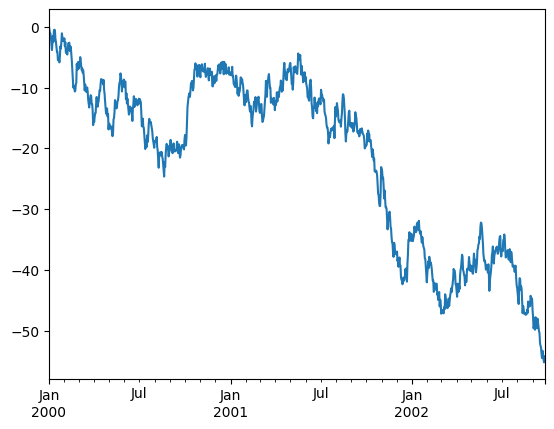

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

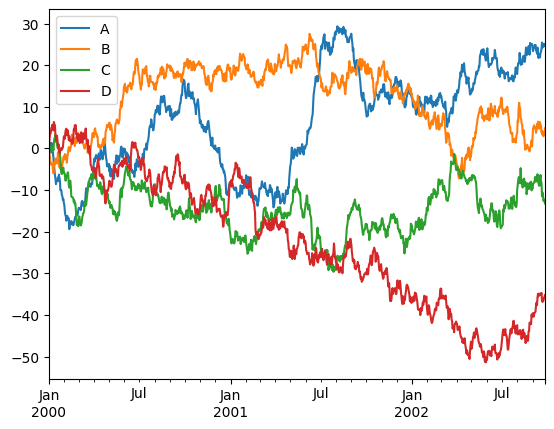

In [96]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [97]:
df.to_csv('foo.csv')

In [98]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.448353,-0.604246,1.288684,0.581850
1,2000-01-02,-0.315036,-1.042517,0.815592,2.071481
2,2000-01-03,-0.594133,-2.193926,0.345680,3.528334
3,2000-01-04,-0.968407,-3.350341,0.092029,3.505981
4,2000-01-05,1.355783,-3.864418,0.459590,4.101026
...,...,...,...,...,...
995,2002-09-22,24.622246,3.894081,-11.331602,-36.497588
996,2002-09-23,25.113641,2.931149,-12.571355,-36.529884
997,2002-09-24,24.514276,3.522447,-12.281288,-35.828250
998,2002-09-25,25.045359,3.812455,-12.361037,-35.730230


# Gotchas
If you are trying an operation and you see an exception like:

In [99]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas-truth) for an explanation and what to do.
